In [1]:
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
# from sklearn.model_selection import train_test_split, GridSearchCV
from bs4 import BeautifulSoup

In [2]:
table= pd.read_csv("./Full Dataset.csv", engine='python')

In [3]:
table.head()

,Name,CAT,Month Test Taken,Sortie Type,Overall Grade,Mission Items,Original comments
0,A ONG,P,14 Feb 19,AISR General,6,Mission Objective,The roles of the flight was clearly defined du...
1,A ONG,P,14 Feb 19,AISR General,6,Mission Planning,"As this was a combine training sortie, the mis..."
2,A ONG,P,14 Feb 19,AISR General,6,In-flight Proficiency,NaN
3,A ONG,P,14 Feb 19,AISR General,6,Pre-Flight / Start-up / Take-Off,NaN
4,A ONG,P,14 Feb 19,AISR General,6,Departure / Transit,NaN


In [4]:
#drop duplicates and empty rows, reset index
table=table.drop_duplicates()
table=table.dropna()
table=table.reset_index(drop=True)

In [5]:
#stopwords= ['sortie','n/a','n\a','i-cop','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'na', 'nil']
stopwords=stopwords.words('english')
stopwords.append('n\a')
stopwords.append('n/a')
stopwords.append('nil')
stopwords.append('i-cop')

stopwords=set(stopwords)

In [6]:
def clean_text(phrase) :
    text=word_tokenize(phrase)
    words_only=[w for w in text if w.isalpha()]
    filtered=[w for w in words_only if not w.lower() in stopwords]
    return (" ".join(filtered))

In [7]:
table['Specific comments']=table['Original comments'].apply(clean_text)
table.head()

,Name,CAT,Month Test Taken,Sortie Type,Overall Grade,Mission Items,Original comments,Specific comments
0,A ONG,P,14 Feb 19,AISR General,6,Mission Objective,The roles of the flight was clearly defined du...,roles flight clearly defined briefing Mission ...
1,A ONG,P,14 Feb 19,AISR General,6,Mission Planning,"As this was a combine training sortie, the mis...",combine training sortie mission plans SQN remi...
2,A ONG,P,14 Feb 19,AISR General,6,In-Flight Procedures,Required checks carried out. \n \n \n,Required checks carried
3,A ONG,P,14 Feb 19,AISR General,6,Icing Conditions,No emergency was injected for this sortie,emergency injected sortie
4,A ONG,P,14 Feb 19,AISR General,6,Area Search,Able to execute search tactics effectively to ...,Able execute search tactics effectively find t...


In [8]:
#to convert empty blanks to NaN, export as csv then import the new csv
#index=False alllows u to save without the index number
table.to_csv("clean_comments.csv", index=False)

In [9]:
clean_table= pd.read_csv("./clean_comments.csv")

In [10]:
clean_table=clean_table.dropna()
clean_table=clean_table.reset_index(drop=True)
clean_table.head()

,Name,CAT,Month Test Taken,Sortie Type,Overall Grade,Mission Items,Original comments,Specific comments
0,A ONG,P,14 Feb 19,AISR General,6,Mission Objective,The roles of the flight was clearly defined du...,roles flight clearly defined briefing Mission ...
1,A ONG,P,14 Feb 19,AISR General,6,Mission Planning,"As this was a combine training sortie, the mis...",combine training sortie mission plans SQN remi...
2,A ONG,P,14 Feb 19,AISR General,6,In-Flight Procedures,Required checks carried out. \r\n \r\n \r\n,Required checks carried
3,A ONG,P,14 Feb 19,AISR General,6,Icing Conditions,No emergency was injected for this sortie,emergency injected sortie
4,A ONG,P,14 Feb 19,AISR General,6,Area Search,Able to execute search tactics effectively to ...,Able execute search tactics effectively find t...


In [11]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words1(text1):
    indiv_word=word_tokenize(text1)
    return(' '.join([lemmatizer.lemmatize(w) for w in indiv_word]).lower())

In [12]:
clean_table['Specific comments']=clean_table['Specific comments'].apply(lemmatize_words1)

In [13]:
clean_table.to_csv("lemmatized_comments.csv", index=False)

In [14]:
#count vectorisation, change ngram 1-4/5
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 50,
                            ngram_range=(2,4)) 
features = vectorizer.fit_transform(clean_table['Specific comments'])


In [15]:
feature_names=vectorizer.get_feature_names()
total_count=features.toarray().sum(axis=0)
df=pd.DataFrame(data=total_count, index=feature_names, columns=['Frequency']).sort_values(by='Frequency', ascending=False)
#df
#see how to save df as png for future ppt
#df.to_csv('Frequency Table.csv')
cell_text=np.array(total_count).reshape(50,1)
#cell_text

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_axis_off()
the_table=ax.table(cellText=cell_text,
                  rowLabels=feature_names)

plt.show()

<Figure size 640x480 with 1 Axes>

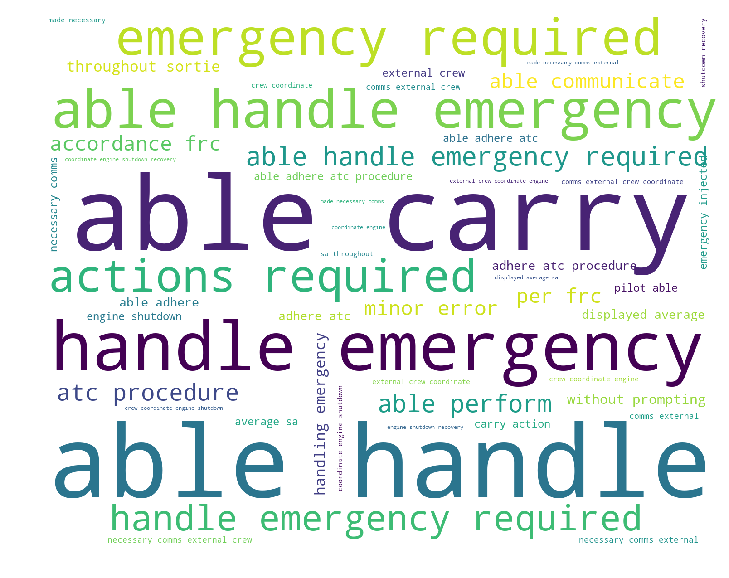

In [17]:
#creating a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(df['Frequency'])

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

#saving to png
#wc.to_file("wordcloud.png")

In [18]:
pd_positive=pd.read_csv('./positive.csv')
pd_negative=pd.read_csv('./negative.csv')

In [19]:
pd_positive=set(pd_positive['positive'])
pd_negative=set(pd_negative['negative'])

pd_positive.add('able')
pd_positive.add('acknowledged')
pd_positive.add('assertive')
pd_positive.add('adhere')
pd_positive.add('assistance')
pd_positive.add('autonomous')
pd_positive.add('cognisant')
pd_positive.add('competent')
pd_positive.add('competency')
pd_positive.add('composure')
pd_positive.add('coordinate')
pd_positive.add('execute')
pd_positive.add('thorough')
pd_positive.add('self-corrected')
pd_positive.add('selfcorrected')
pd_positive.add('0 errors')
pd_positive.add('zero errors')
pd_positive.add('no errors')
pd_positive.add('no prompting')

pd_negative.add('unable')
pd_negative.add('hesitate')
pd_negative.add('hesitation')
pd_negative.add('late')
pd_negative.add('major')
pd_negative.add('minimal')
pd_negative.add('minor')
pd_negative.add('prompting')
pd_negative.add('re-demonstration')
pd_negative.add('redemonstration')
pd_negative.add('rush')
pd_negative.remove('errors')
pd_negative.remove('error')

#neutral words
# pd_positive.remove('FRC')
#pd_negative.remove('FRC')
# pd_positive.remove('highlight')
# pd_negative.remove('highlight')
# pd_positive.remove('periodic')
# pd_negative.remove('periodic')
# pd_positive.remove('periodically')
# pd_negative.remove('periodically')
# pd_positive.remove('realign')
# pd_negative.remove('realign')
# pd_positive.remove('re-align')
# pd_negative.remove('re-align')
# pd_positive.remove('SA')
# pd_negative.remove('SA')
# pd_positive.remove('verbalize')
# pd_negative.remove('verbalize')
pd_negative.remove('emergency')

In [20]:
def sentiment_analyser(text):
#Lemmatize our words
    word = text.split()
    word_len = len(word)
    lemma_words = [lemmatizer.lemmatize(i) for i in word]
    
    # Lemmatize our positive words.
    lemma_pos = [lemmatizer.lemmatize(pos_word) for pos_word in pd_positive]
    pos_set = set(lemma_pos)    
                         
    # Lemmatize our negative words.
    lemma_neg = [lemmatizer.lemmatize(neg_word) for neg_word in pd_negative]
    neg_set = set(lemma_neg)
                         
    # Count "positive" words.
    # add 1 to the count each time a positive word is found in the list of lemmatized words
    pos_count = 0
    neg_count = 0           
    for i in lemma_words:
        if i in pos_set:
            pos_count += 1
        elif i in neg_set:
            neg_count += 1 
    # Calculate Sentiment Percentage 
    # (Positive Count - Negative Count) / (Total Count)
    res = (pos_count - neg_count)/word_len
    #print(pos_count,neg_count,word_len)
    return round(res,4) #round to 4 decimal places. You may change this value.

In [21]:
senti_table=pd.read_csv('./lemmatized_comments.csv')

In [22]:
senti_table.head()

,Name,CAT,Month Test Taken,Sortie Type,Overall Grade,Mission Items,Original comments,Specific comments
0,A ONG,P,14 Feb 19,AISR General,6,Mission Objective,The roles of the flight was clearly defined du...,role flight clearly defined briefing mission o...
1,A ONG,P,14 Feb 19,AISR General,6,Mission Planning,"As this was a combine training sortie, the mis...",combine training sortie mission plan sqn remin...
2,A ONG,P,14 Feb 19,AISR General,6,In-Flight Procedures,Required checks carried out. \r\r\n \r\r\n \r\r\n,required check carried
3,A ONG,P,14 Feb 19,AISR General,6,Icing Conditions,No emergency was injected for this sortie,emergency injected sortie
4,A ONG,P,14 Feb 19,AISR General,6,Area Search,Able to execute search tactics effectively to ...,able execute search tactic effectively find ta...


In [23]:
senti_table['Sentiment Score']=senti_table['Specific comments'].apply(sentiment_analyser)

In [24]:
senti_table.head()

,Name,CAT,Month Test Taken,Sortie Type,Overall Grade,Mission Items,Original comments,Specific comments,Sentiment Score
0,A ONG,P,14 Feb 19,AISR General,6,Mission Objective,The roles of the flight was clearly defined du...,role flight clearly defined briefing mission o...,0.0588
1,A ONG,P,14 Feb 19,AISR General,6,Mission Planning,"As this was a combine training sortie, the mis...",combine training sortie mission plan sqn remin...,0.0455
2,A ONG,P,14 Feb 19,AISR General,6,In-Flight Procedures,Required checks carried out. \r\r\n \r\r\n \r\r\n,required check carried,0.0000
3,A ONG,P,14 Feb 19,AISR General,6,Icing Conditions,No emergency was injected for this sortie,emergency injected sortie,0.0000
4,A ONG,P,14 Feb 19,AISR General,6,Area Search,Able to execute search tactics effectively to ...,able execute search tactic effectively find ta...,0.3333


In [25]:
senti_table.to_csv('Sentiment Table.csv',index=False)